# Task 0.1

## FairFace

In [1]:
import pandas as pd
import numpy as np

# Load the training data and validation data
train_data = pd.read_csv('./Fairface/Annotations/fairface_label_train.csv')
val_data = pd.read_csv('./Fairface/Annotations/fairface_label_val.csv')

# Create a function to split the data and insert NaN values
def split_data(data):
    is_train_data = data.equals(train_data)
    if is_train_data:
        data['split'] = ['train'] * len(data)
    else:
        data['split'] = ['val'] * len(data)
        
    # Insert NaN values in the 'age' and 'emotion' columns
    data['age'] = np.nan
    data['emotion'] = np.nan
    return data
# Split and modify the training data and validation data
train_data = split_data(train_data)
val_data = split_data(val_data)

# Specify the desired column order
desired_columns = ['file', 'age', 'age range', 'gender', 'race', 'split', 'emotion']
# Reorder the columns
train_data.columns = desired_columns
val_data.columns = desired_columns
ff_df=pd.concat([train_data,val_data]) #combine

#error fix
ff_df['race']=ff_df['gender']
ff_df['gender']=ff_df['age range']
fix=pd.concat([pd.read_csv('./Fairface/Annotations/fairface_label_train.csv'),pd.read_csv('./Fairface/Annotations/fairface_label_val.csv')])
ff_df['age range']=fix['age']

#ff_df.to_csv('./datasplits/fairface')
ff_df

,file,age,age range,gender,race,split,emotion
0,train/1.jpg,NaN,50-59,Male,East Asian,train,NaN
1,train/2.jpg,NaN,30-39,Female,Indian,train,NaN
2,train/3.jpg,NaN,3-9,Female,Black,train,NaN
3,train/4.jpg,NaN,20-29,Female,Indian,train,NaN
4,train/5.jpg,NaN,20-29,Female,Indian,train,NaN
...,...,...,...,...,...,...,...
10949,val/10950.jpg,NaN,30-39,Male,White,val,NaN
10950,val/10951.jpg,NaN,50-59,Male,White,val,NaN
10951,val/10952.jpg,NaN,60-69,Male,Latino_Hispanic,val,NaN
10952,val/10953.jpg,NaN,20-29,Female,East Asian,val,NaN


## RAF

In [2]:
import pandas as pd
import numpy as np
import glob
import os
#import
raf_emo = pd.read_csv("./RAF/Annotations/list_patition_label.txt", sep="\s+", header = None)
raf_emo.columns=['file','emotion']

data = []

txtfiles = glob.glob('./RAF/Annotations/manual/*.txt')
for i in txtfiles:
    file=open(i,'r', encoding='utf-8')
    tstrn = os.path.splitext(os.path.basename(i))[0]
    tstrn= tstrn.split('_')[0]
    read=file.readlines()
    lines= read[5:]
    lines = [line.rstrip('\n') for line in lines]
    data.append({
        'age':np.nan,
        'age range': lines[2],
        'gender':lines[0],
        'race':lines[1],
        'split': tstrn
    })
raf_df=pd.DataFrame(data)
raf_df['emotion']=raf_emo['emotion']
raf_df.insert(0,'file',raf_emo['file'])
'''
age_class= ['0-3','4-19','20-39','40-69','70+']    #it didnt work
# 0: 0-3  1: 4-19  2: 20-39   3: 40-69 4: 70+
for i in range(len(raf_df['age range'])):
    for j in raf_df['age range']:
        if raf_df['age range'][i]==2:
            raf_df['age range'][i]='hahaha'''

#raf_df.to_csv('./datasplits/raf')
raf_df
        

,file,age,age range,gender,race,split,emotion
0,train_00001.jpg,NaN,2,1,2,test,5
1,train_00002.jpg,NaN,1,1,2,test,5
2,train_00003.jpg,NaN,1,1,0,test,4
3,train_00004.jpg,NaN,2,1,0,test,4
4,train_00005.jpg,NaN,1,2,2,test,5
...,...,...,...,...,...,...,...
15334,test_3064.jpg,NaN,1,0,1,train,7
15335,test_3065.jpg,NaN,0,0,0,train,7
15336,test_3066.jpg,NaN,1,1,0,train,7
15337,test_3067.jpg,NaN,1,0,1,train,7


## UTK

In [3]:
import pandas as pd    
import numpy as np                                                     
import glob
import os

folder_path = "./UTK/Images/UTKFace/UTKFace/"  
data = []
for file_path in glob.glob(os.path.join(folder_path, "*.jpg")):
    file_name = os.path.basename(file_path)
    file_name = os.path.splitext(file_name)[0]  # Remove the file extension
    components = file_name.split("_")
    age = components[0]
    gender = components[1]
    race = components[2] if len(components) >= 3 else None
    datetime = components[3] if len(components) >= 4 else None
    data.append({
        'file': file_name,
        'age': age,
        'age range':age,        #--
        'gender': gender,
        'race': race,
        'split': age,           #--
        'emotion':age,          #--
    })

utk_df = pd.DataFrame(data)
utk_df['age range']=np.nan
utk_df['split']=np.nan
utk_df['emotion']=np.nan

utk_df

,file,age,age range,gender,race,split,emotion
0,100_0_0_20170112213500903.jpg.chip,100,NaN,0,0,NaN,NaN
1,100_0_0_20170112215240346.jpg.chip,100,NaN,0,0,NaN,NaN
2,100_1_0_20170110183726390.jpg.chip,100,NaN,1,0,NaN,NaN
3,100_1_0_20170112213001988.jpg.chip,100,NaN,1,0,NaN,NaN
4,100_1_0_20170112213303693.jpg.chip,100,NaN,1,0,NaN,NaN
...,...,...,...,...,...,...,...
23703,9_1_3_20161220222856346.jpg.chip,9,NaN,1,3,NaN,NaN
23704,9_1_3_20170104222949455.jpg.chip,9,NaN,1,3,NaN,NaN
23705,9_1_4_20170103200637399.jpg.chip,9,NaN,1,4,NaN,NaN
23706,9_1_4_20170103200814791.jpg.chip,9,NaN,1,4,NaN,NaN


# Task 0.2

## FairFace

In [5]:
ff_csv = pd.read_csv('./datasplits/fairface')
import matplotlib.pyplot as plt   #we will try this and sns too
import seaborn as sns
import random

train_ffdf = ff_csv[ff_csv['split'] == 'train'] #get train
val_ffdf = ff_csv[ff_csv['split'] == 'val']     #getv val

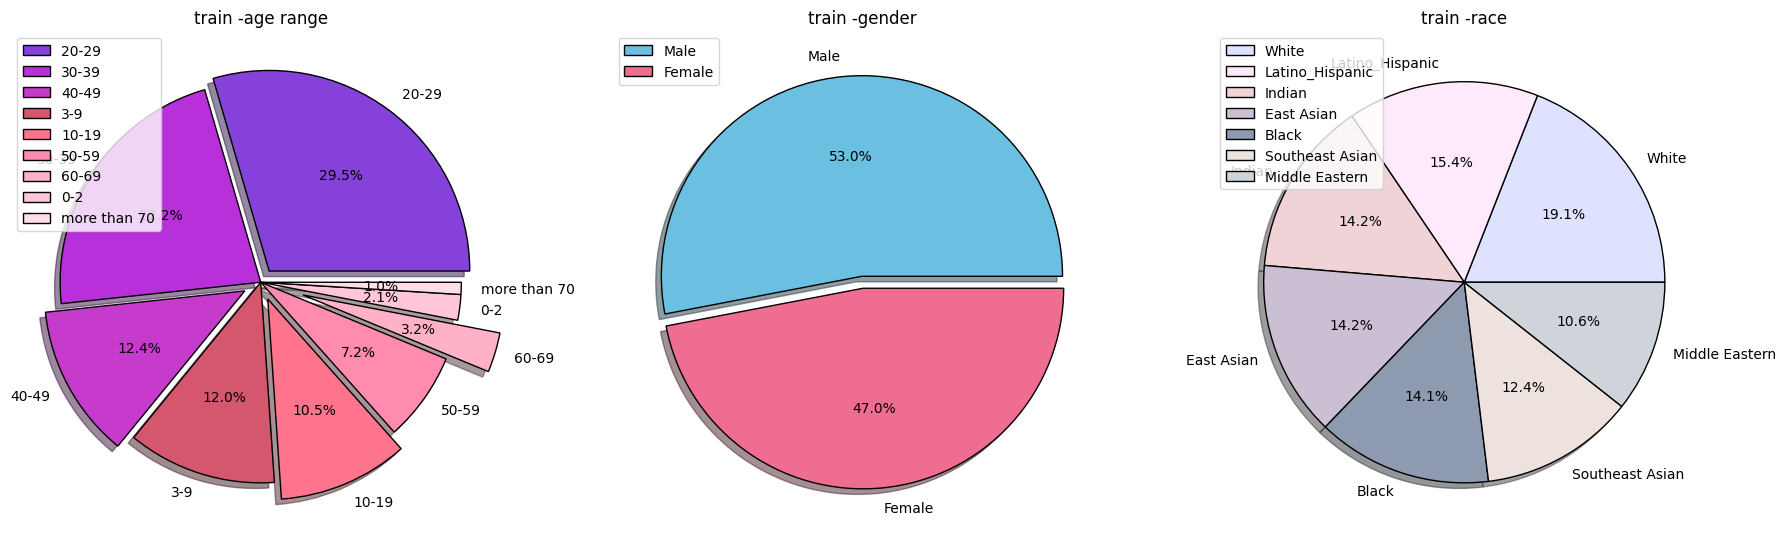

In [6]:
agelab_ff=(pd.DataFrame(train_ffdf['age range'].value_counts())).index.tolist()   #labels
genlab_ff=(pd.DataFrame(train_ffdf['gender'].value_counts())).index.tolist()
racelab_ff=(pd.DataFrame(train_ffdf['race'].value_counts())).index.tolist()

ageplot_ff=train_ffdf['age range'].value_counts()     #pie-val
genplot_ff=train_ffdf['gender'].value_counts()
raceplot_ff=train_ffdf['race'].value_counts()

fig, fftgraph = plt.subplots(1, 3, figsize=(22, 20))
explode=[0.07,0,0.09,0,0.09,0,0.22,0,0]
colors=['#8641db','#b830da','#c73bcc','#d4576e','#ff748d','#ff8baf','#ffb2c7','#ffc7d8','#ffdee9']
wedgeprops= wedgeprops={'edgecolor': 'black'}

#design
# Plot the first pie chart in the first subplot
fftgraph[0].pie(ageplot_ff, labels=agelab_ff, autopct='%1.1f%%',
               colors=colors, explode=explode, shadow=True, wedgeprops=wedgeprops)
fftgraph[0].legend(loc='upper left')
fftgraph[0].set_title('train -age range')

# Plot the second pie chart in the second subplot
fftgraph[1].pie(genplot_ff, labels=genlab_ff, autopct='%1.1f%%', explode=[0.03,0.03],
                colors=['#6bc0e2','#ef6d90'], shadow=True, wedgeprops=wedgeprops)
fftgraph[1].legend(loc='upper left')
fftgraph[1].set_title('train -gender')

# Plot the third pie chart in the third subplot
fftgraph[2].pie(raceplot_ff, labels=racelab_ff, autopct='%1.1f%%',
                colors=['#dee2ff','#feeafa','#efd3d7','#cbc0d3','#8e9aaf','#eee2df','#ced4da'],
                shadow=True, wedgeprops=wedgeprops)
fftgraph[2].legend(loc='upper left')
fftgraph[2].set_title('train -race');

val

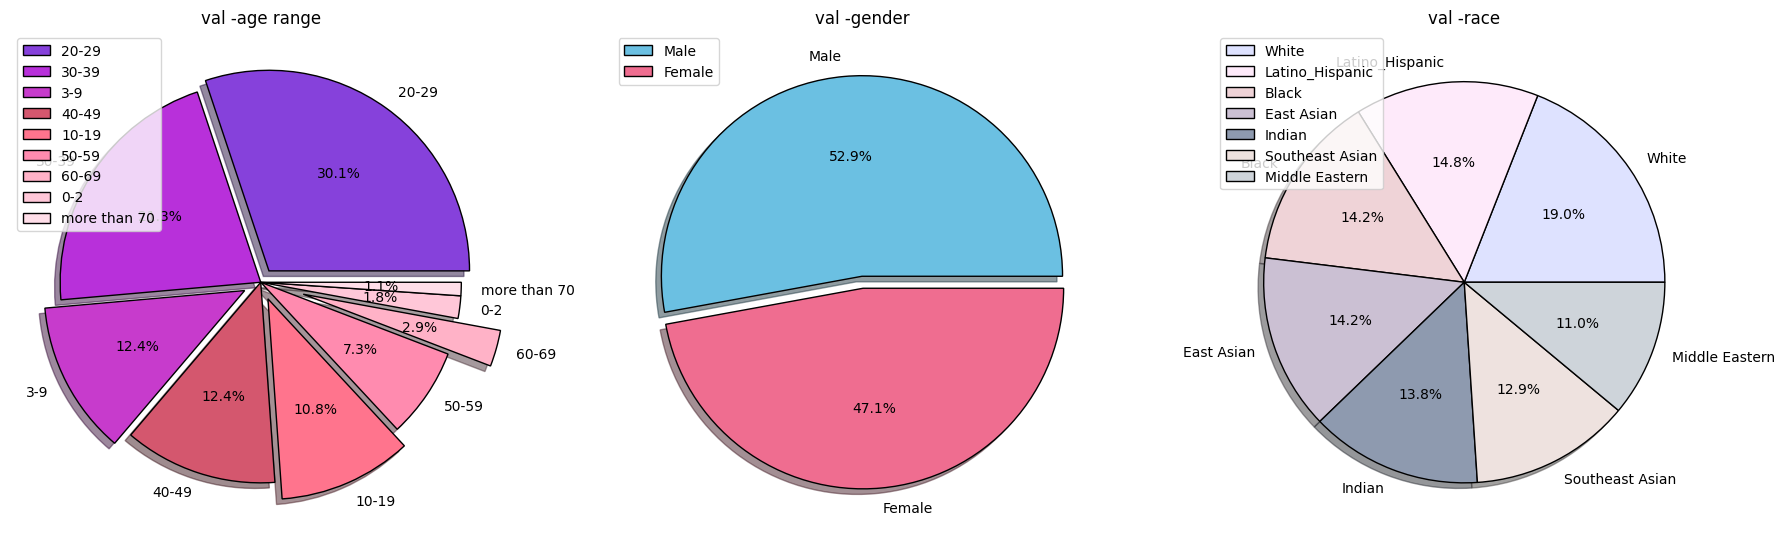

In [7]:
agerangelab2_ff=(pd.DataFrame(val_ffdf['age range'].value_counts())).index.tolist()
genlab2_ff=(pd.DataFrame(val_ffdf['gender'].value_counts())).index.tolist()
racelab2_ff=(pd.DataFrame(val_ffdf['race'].value_counts())).index.tolist()

agerangeplot2_ff=val_ffdf['age range'].value_counts()     #pie-val
genplot2_ff=val_ffdf['gender'].value_counts()
raceplot2_ff=val_ffdf['race'].value_counts()

fig, ffvgraph = plt.subplots(1, 3, figsize=(22, 20))
explode=[0.07,0,0.09,0,0.09,0,0.22,0,0]
colors=['#8641db','#b830da','#c73bcc','#d4576e','#ff748d','#ff8baf','#ffb2c7','#ffc7d8','#ffdee9']
wedgeprops= wedgeprops={'edgecolor': 'black'}

#design
# Plot the first pie chart in the first subplot
ffvgraph[0].pie(agerangeplot2_ff, labels=agerangelab2_ff, autopct='%1.1f%%',
               colors=colors, explode=explode, shadow=True, wedgeprops=wedgeprops)
ffvgraph[0].legend(loc='upper left')
ffvgraph[0].set_title('val -age range')

# Plot the second pie chart in the second subplot
ffvgraph[1].pie(genplot2_ff, labels=genlab2_ff, autopct='%1.1f%%', explode=[0.03,0.03],
                colors=['#6bc0e2','#ef6d90'], shadow=True, wedgeprops=wedgeprops)
ffvgraph[1].legend(loc='upper left')
ffvgraph[1].set_title('val -gender')

# Plot the third pie chart in the third subplot
ffvgraph[2].pie(raceplot2_ff, labels=racelab2_ff, autopct='%1.1f%%',
                colors=['#dee2ff','#feeafa','#efd3d7','#cbc0d3','#8e9aaf','#eee2df','#ced4da'],
                shadow=True, wedgeprops=wedgeprops)
ffvgraph[2].legend(loc='upper left')
ffvgraph[2].set_title('val -race');

## RAF

test

''

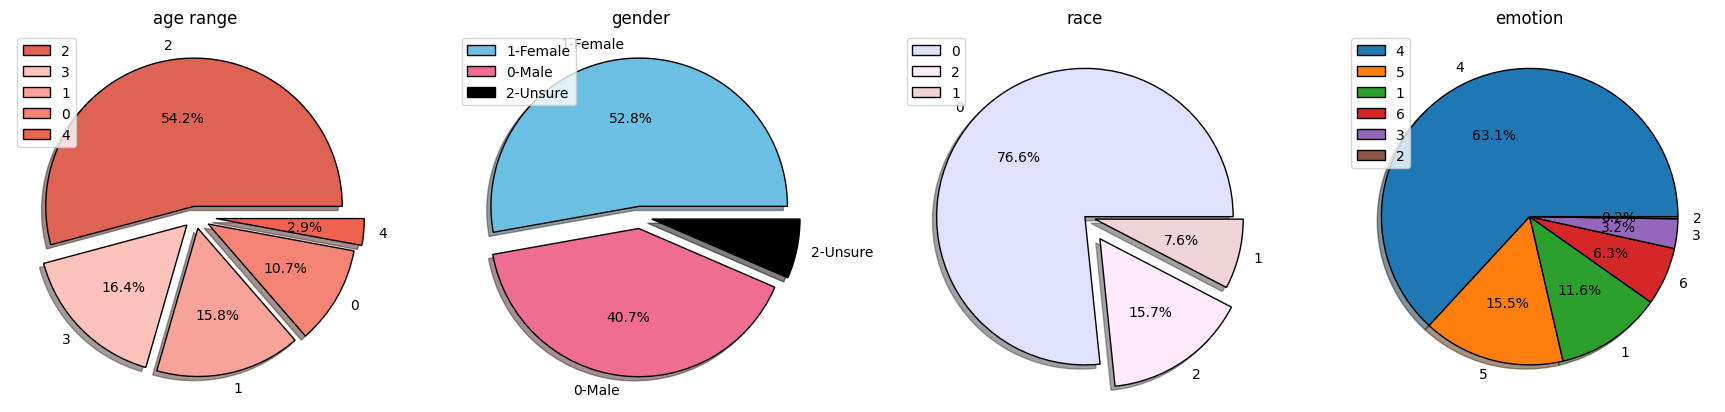

In [8]:
raf_csv=pd.read_csv('./datasplits/raf')

test_rafdf=raf_csv[raf_csv['split'] == 'test']
train_rafdf=raf_csv[raf_csv['split'] == 'train']

agerangelab_raf=(pd.DataFrame(test_rafdf['age range'].value_counts())).index.tolist()  #labels
genlab_raf=(pd.DataFrame(test_rafdf['gender'].value_counts())).index.tolist()
racelab_raf=(pd.DataFrame(test_rafdf['race'].value_counts())).index.tolist()
emolab_raf=(pd.DataFrame(test_rafdf['emotion'].value_counts())).index.tolist()

agerangeplot_raf=test_rafdf['age range'].value_counts()
genplot_raf=test_rafdf['gender'].value_counts()
raceplot_raf=test_rafdf['race'].value_counts()
emoplot_raf=test_rafdf['emotion'].value_counts()

fig, raftestgraph = plt.subplots(1, 4, figsize=(22, 20))
wedgeprops= wedgeprops={'edgecolor': 'black'}

#design
# Plot the first pie chart in the first subplot
raftestgraph[0].pie(agerangeplot_raf, labels=agerangelab_raf, autopct='%1.1f%%',
               colors=['#df6354','#fbc3bc','#f7a399','#f38375','#ef6351'], explode=[0.07,0.08,0.08,0.1,0.14],
                shadow=True, wedgeprops=wedgeprops)
raftestgraph[0].legend(loc='upper left')
raftestgraph[0].set_title('age range')

# Plot the second pie chart in the second subplot
raftestgraph[1].pie(genplot_raf, labels=['1-Female','0-Male','2-Unsure'], autopct='%1.1f%%',
                colors=['#6bc0e2','#ef6d90','black'], shadow=True, explode=[0.07,0.08,0.08],
                wedgeprops=wedgeprops)
raftestgraph[1].legend(loc='upper left')
raftestgraph[1].set_title('gender')

# Plot the third pie chart in the third subplot
raftestgraph[2].pie(raceplot_raf, labels=racelab_raf, autopct='%1.1f%%',
                colors=['#dee2ff','#feeafa','#efd3d7','#cbc0d3','#8e9aaf','#eee2df','#ced4da'], explode=[0,0.18,0.07],
                shadow=True, wedgeprops=wedgeprops)
raftestgraph[2].legend(loc='upper left')
raftestgraph[2].set_title('race')

# Plot the fourth pie chart in the fourth subplot
raftestgraph[3].pie(emoplot_raf, labels=emolab_raf, autopct='%1.1f%%',

                shadow=True, wedgeprops=wedgeprops)
raftestgraph[3].legend(loc='upper left')
raftestgraph[3].set_title('emotion')
;


train

Text(0.5, 1.0, 'emotion')

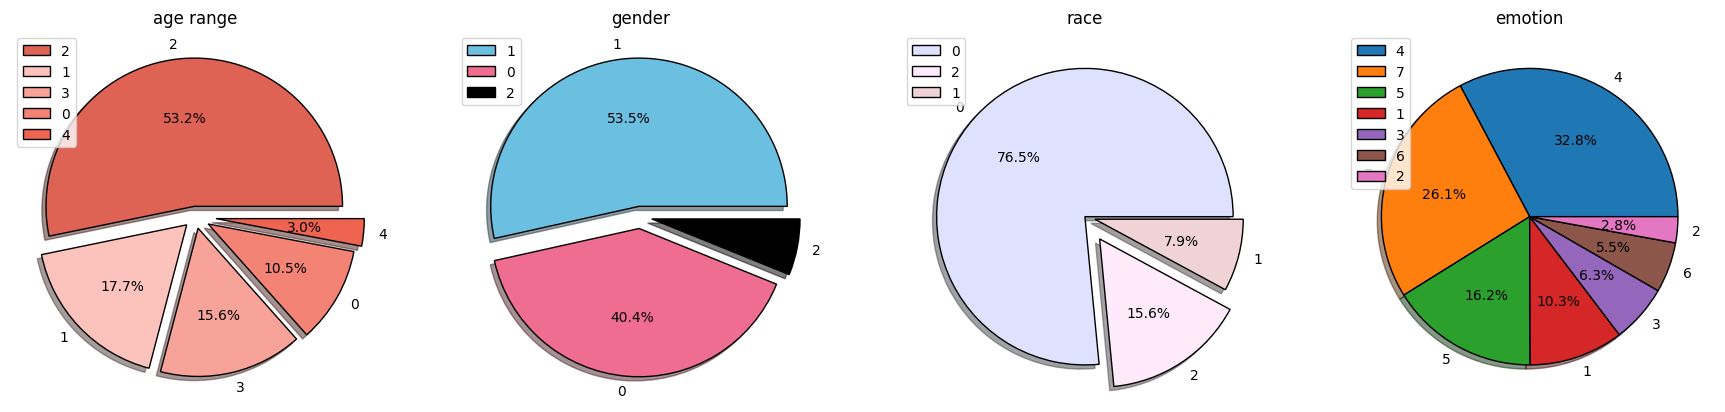

In [9]:
agerangelab2_raf=(pd.DataFrame(train_rafdf['age range'].value_counts())).index.tolist()  #labels
genlab2_raf=(pd.DataFrame(train_rafdf['gender'].value_counts())).index.tolist()
racelab2_raf=(pd.DataFrame(train_rafdf['race'].value_counts())).index.tolist()
emolab2_raf=(pd.DataFrame(train_rafdf['emotion'].value_counts())).index.tolist()

agerangeplot2_raf=train_rafdf['age range'].value_counts()
genplot2_raf=train_rafdf['gender'].value_counts()
raceplot2_raf=train_rafdf['race'].value_counts()
emoplot2_raf=train_rafdf['emotion'].value_counts()

fig, raftestgraph = plt.subplots(1, 4, figsize=(22, 20))
wedgeprops= wedgeprops={'edgecolor': 'black'}

#design
# Plot the first pie chart in the first subplot
raftestgraph[0].pie(agerangeplot2_raf, labels=agerangelab2_raf, autopct='%1.1f%%',
               colors=['#df6354','#fbc3bc','#f7a399','#f38375','#ef6351'], explode=[0.07,0.08,0.08,0.1,0.14],
                shadow=True, wedgeprops=wedgeprops)
raftestgraph[0].legend(loc='upper left')
raftestgraph[0].set_title('age range')

# Plot the second pie chart in the second subplot
raftestgraph[1].pie(genplot2_raf, labels=genlab2_raf, autopct='%1.1f%%',
                colors=['#6bc0e2','#ef6d90','black'], shadow=True, explode=[0.07,0.08,0.08],
                wedgeprops=wedgeprops)
raftestgraph[1].legend(loc='upper left')
raftestgraph[1].set_title('gender')

# Plot the third pie chart in the third subplot
raftestgraph[2].pie(raceplot2_raf, labels=racelab2_raf, autopct='%1.1f%%',
                colors=['#dee2ff','#feeafa','#efd3d7','#cbc0d3','#8e9aaf','#eee2df','#ced4da'], explode=[0,0.18,0.07],
                shadow=True, wedgeprops=wedgeprops)
raftestgraph[2].legend(loc='upper left')
raftestgraph[2].set_title('race')

# Plot the fourth pie chart in the fourth subplot
raftestgraph[3].pie(emoplot2_raf, labels=emolab2_raf, autopct='%1.1f%%',

                shadow=True, wedgeprops=wedgeprops)
raftestgraph[3].legend(loc='upper left')
raftestgraph[3].set_title('emotion')

## UTK

ValueError: 'explode' must be of length 'x'

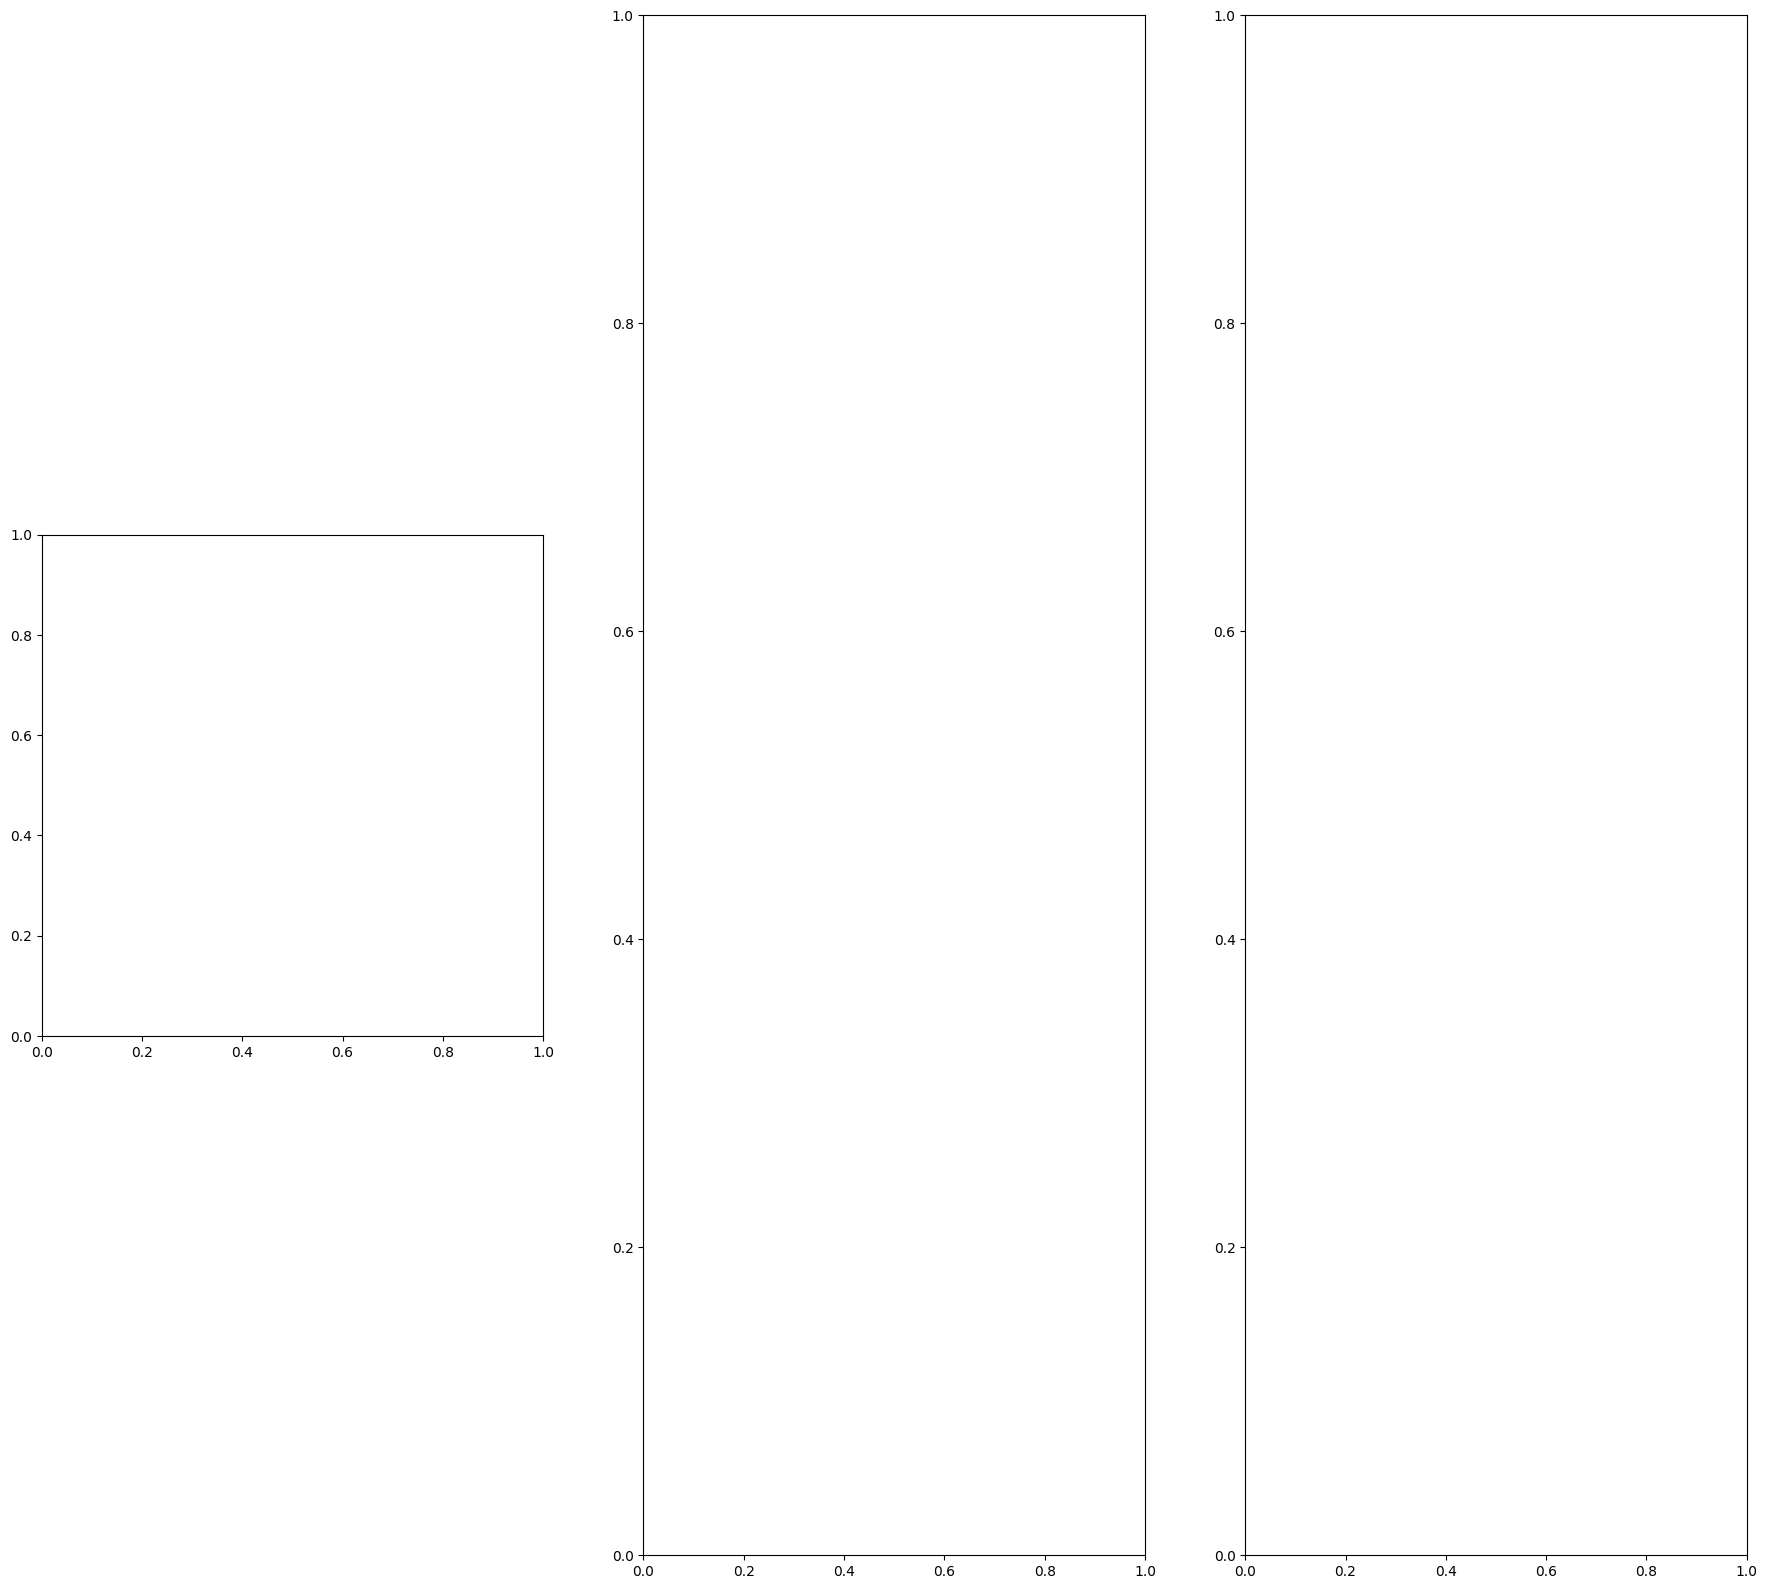

In [13]:
utk_csv=pd.read_csv('./datasplits/utk')

agelab_utk=(pd.DataFrame(utk_csv['age'].value_counts())).index.tolist()  #labels
agerangelab_utk=(pd.DataFrame(utk_csv['age range'].value_counts())).index.tolist()
genlab_utk=(pd.DataFrame(utk_csv['gender'].value_counts())).index.tolist()
racelab_utk=(pd.DataFrame(utk_csv['race'].value_counts())).index.tolist()

ageplot_utk=utk_csv['age'].value_counts()      #val
agerangeplot_utk=utk_csv['age range'].value_counts()
genplot_utk=utk_csv['gender'].value_counts()
raceplot_utk=utk_csv['race'].value_counts()

fig, utkgraph = plt.subplots(1, 3, figsize=(22, 20))
wedgeprops= wedgeprops={'edgecolor': 'black'}

#design
# Plot the first pie chart in the first subplot
utkgraph[0].pie(agerangeplot_utk, labels=agerangelab_utk, autopct='%1.1f%%',
               colors=['#df6354','#fbc3bc','#f7a399','#f38375','#ef6351'], explode=[0.07,0.08,0.08,0.1,0.14],
                shadow=True, wedgeprops=wedgeprops)
utkgraph[0].legend(loc='upper left')
utkgraph[0].set_title('age range')

# Plot the second pie chart in the second subplot
utkgraph[1].pie(genplot_utk, labels=genlab_utk, autopct='%1.1f%%',
                colors=['#6bc0e2','#ef6d90'], shadow=True, explode=[0.04,0.04],
                wedgeprops=wedgeprops)
utkgraph[1].legend(loc='upper left')
utkgraph[1].set_title('gender')

# Plot the third pie chart in the third subplot
utkgraph[2].pie(raceplot_utk, labels=racelab_utk, autopct='%1.1f%%',
                colors=['#dee2ff','#feeafa','#efd3d7','#cbc0d3','#8e9aaf','#eee2df','#ced4da'],
                shadow=True, wedgeprops=wedgeprops)
utkgraph[2].legend(loc='upper left')
utkgraph[2].set_title('race')

# Plot the fourth pie chart in the fourth subplot
'''utkgraph[3].pie(ageplot_utk, labels=agelab_utk, autopct='%1.1f%%',
                colors=['#dee2ff','#feeafa','#efd3d7','#cbc0d3','#8e9aaf','#eee2df','#ced4da'],
                shadow=True, wedgeprops=wedgeprops)
utkgraph[3].legend(loc='upper left')
utkgraph[3].set_title('age');''';

# Task 0.3

## gender

''

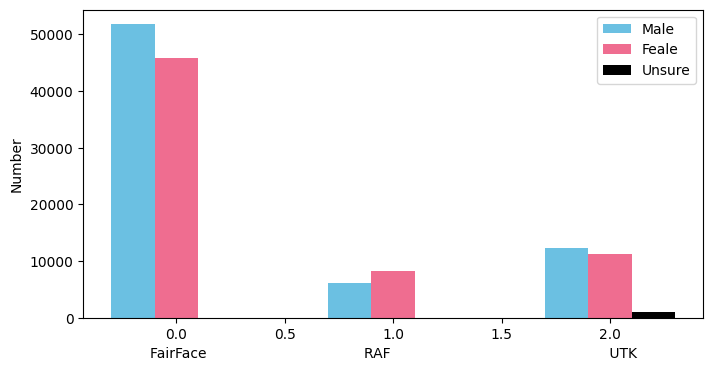

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ff_inf=pd.read_csv('./datasplits/fairface')
raf_inf=pd.read_csv('./datasplits/raf')
utk_inf=pd.read_csv('./datasplits/utk')

ff_values=ff_inf['gender'].value_counts()
raf_values=raf_inf['gender'].value_counts()
utk_values=utk_inf['gender'].value_counts()
#swap
temp = raf_values.iloc[1]
raf_values.iloc[1] = raf_values.iloc[0]
raf_values.iloc[0] = temp

#male=man----female=girl----unsure=chair
gen_val_male=[ff_values.loc['Male'],raf_values.iloc[0],utk_values.iloc[0]]
gen_val_female=[ff_values.loc['Female'],raf_values.iloc[1],utk_values.iloc[1]]
gen_val_unsure=[0,0,raf_values.loc[2]]

#labels and pos.
labels=['FairFace','Raf','UTK']
x_indexes = np.arange(len(labels))

fig,gen =plt.subplots(figsize=(8,4))

#almost done
gen.bar(x_indexes-0.2,gen_val_male,width=(0.2),label='Male',color='#6bc0e2')
gen.bar(x_indexes,gen_val_female,width=(0.2),label='Feale',color='#ef6d90')
gen.bar(x_indexes+0.2,gen_val_unsure,width=(0.2),label='Unsure',color='black')

gen.legend(loc='upper right')
gen.set_xlabel('FairFace                                    RAF                                                  UTK')
gen.set_ylabel('Number')
#gen_set.title('ahahha')
;

## age



```
raf   0   ||    1       ||   2           || 3                   ||  4

utk   0-3 ||  4-19      || 20-39         || 40-69               || 70+

-

ff    0-2 ||  3-9+10-19 ||  20-29+30-39  || 40-49+(50-59)+60-69 ||  70+
```



In [17]:
ff_values_age=ff_inf['age range'].value_counts()
raf_values_age=raf_inf['age range'].value_counts()
utk_values_age=utk_inf['age range'].value_counts()

'ff_values_age,raf_values_age,utk_values_age'
gr1=[ff_values_age.loc['0-2'],
     raf_values_age.loc[0],utk_values_age.loc['0-3']]
gr2=[ff_values_age.loc['3-9']+
     ff_values_age.loc['10-19'],
     raf_values_age.loc[1],utk_values_age.loc['4-19']]
gr3=[ff_values_age.loc['20-29']+
     ff_values_age.loc['30-39'],
     raf_values_age.loc[2],utk_values_age.loc['20-39']]
gr4=[ff_values_age.loc['40-49']+
     ff_values_age.loc['50-59']+
     ff_values_age.loc['60-69'],
     raf_values_age.loc[3],utk_values_age.loc['40-69']]
gr5=[ff_values_age.loc['more than 70'],
     raf_values_age.loc[4],utk_values_age.loc['70+']]
ff_values_age

gr_labs=['0-3','4-19','20-39','40-69','70+']
#xx

fig,age =plt.subplots(figsize=(8,4))
age.bar(x_indexes-0.1 ,gr1,label=gr_labs[0],width=(0.1))
age.bar(x_indexes-0.2 ,gr2,label=gr_labs[1],width=(0.1))
age.bar(x_indexes     ,gr3,label=gr_labs[2],width=(0.1))
age.bar(x_indexes+0.1 ,gr4,label=gr_labs[3],width=(0.1))
age.bar(x_indexes+0.2 ,gr5,label=gr_labs[4],width=(0.1))
age.legend(loc='upper right')
age.set_xlabel('FairFace                                        RAF                                             UTK')
age.set_ylabel('Number')


KeyError: '0-3'

## race



```
   --------------------------------------------------------------------- 7x3
  Race
RAF   0: Caucasian+  1: African-American+  2: Asian+
UTK   0: White+      1: Black+             2: Asian+  3: Indian+  4: Others+
FF       White+         Black+       Indian+    Latino_Hispanic+    East Asian   Southeast Asian    Middle Eastern
```



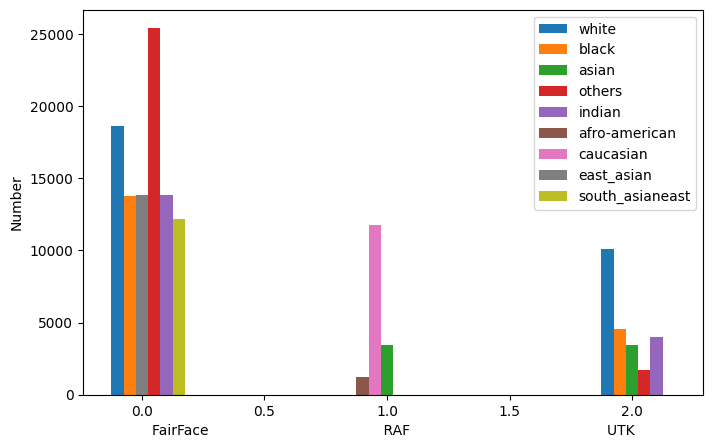

In [18]:
ff_values_race=ff_inf['race'].value_counts()
raf_values_race=raf_inf['race'].value_counts()
utk_values_race=utk_inf['race'].value_counts()

white=[ff_values_race.loc['White'],0,utk_values_race.loc['0']]
black=[ff_values_race.loc['Black'],0,utk_values_race.loc['1']]
asian=[0,utk_values_race.loc['2'],utk_values_race.loc['2']]
others=[ff_values_race.loc['Latino_Hispanic']+
        ff_values_race.loc['Middle Eastern'],0,utk_values_race.loc['4']]
indian=[ff_values_race.loc['Indian'],0,utk_values_race.loc['3']]
afro_amer=[0,raf_values_race.loc[1],0]
cauc=[0,raf_values_race.loc[0],0]
ea_asian=[ff_values_race.loc['East Asian'],0,0]
so_asian=[ff_values_race.loc['Southeast Asian'],0,0]
#xx
fig,race =plt.subplots(figsize=(8,5))
race.bar(x_indexes-0.1 ,white,label='white',width=(0.05))
race.bar(x_indexes-0.05 ,black,label='black',width=(0.05))
race.bar(x_indexes     ,asian,label='asian',width=(0.05))
race.bar(x_indexes+0.05 ,others,label='others',width=(0.05))
race.bar(x_indexes+0.1 ,indian,label='indian',width=(0.05))
race.bar(x_indexes-0.1 ,afro_amer,label='afro-american',width=(0.05))
race.bar(x_indexes-0.05 ,cauc,label='caucasian',width=(0.05))
race.bar(x_indexes     ,ea_asian,label='east_asian',width=(0.05))
race.bar(x_indexes+0.15 ,so_asian,label='south_asianeast',width=(0.05))
race.legend(loc='upper right')
race.set_xlabel('FairFace                                        RAF                                             UTK')
race.set_ylabel('Number')
race.legend()


## - - - - - -|
## - - -ALL THREE|
## - - - - --|

In [15]:
#combine all code
ff_inf=pd.read_csv('./datasplits/fairface')
raf_inf=pd.read_csv('./datasplits/raf')
utk_inf=pd.read_csv('./datasplits/utk')

ff_values=ff_inf['gender'].value_counts()
raf_values=raf_inf['gender'].value_counts()
utk_values=utk_inf['gender'].value_counts()

temp = raf_values.iloc[1]
raf_values.iloc[1] = raf_values.iloc[0]
raf_values.iloc[0] = temp

gen_val_male=[ff_values.loc['Male'],raf_values.iloc[0],utk_values.iloc[0]]
gen_val_female=[ff_values.loc['Female'],raf_values.iloc[1],utk_values.iloc[1]]
gen_val_unsure=[0,0,raf_values.loc[2]]

#import
ff_values_age=ff_inf['age range'].value_counts()
raf_values_age=raf_inf['age range'].value_counts()
utk_values_age=utk_inf['age range'].value_counts()

'ff_values_age,raf_values_age,utk_values_age'
gr1=[ff_values_age.loc['0-2'],
     raf_values_age.loc[0],utk_values_age.loc['0-3']]
gr2=[ff_values_age.loc['3-9']+
     ff_values_age.loc['10-19'],
     raf_values_age.loc[1],utk_values_age.loc['4-19']]
gr3=[ff_values_age.loc['20-29']+
     ff_values_age.loc['30-39'],
     raf_values_age.loc[2],utk_values_age.loc['20-39']]
gr4=[ff_values_age.loc['40-49']+
     ff_values_age.loc['50-59']+
     ff_values_age.loc['60-69'],
     raf_values_age.loc[3],utk_values_age.loc['40-69']]
gr5=[ff_values_age.loc['more than 70'],
     raf_values_age.loc[4],utk_values_age.loc['70+']]
ff_values_age

gr_labs=['0-3','4-19','20-39','40-69','70+']

#import
ff_values_race=ff_inf['race'].value_counts()
raf_values_race=raf_inf['race'].value_counts()
utk_values_race=utk_inf['race'].value_counts()

white=[ff_values_race.loc['White'],0,utk_values_race.loc['0']]
black=[ff_values_race.loc['Black'],0,utk_values_race.loc['1']]
asian=[0,utk_values_race.loc['2'],utk_values_race.loc['2']]
others=[ff_values_race.loc['Latino_Hispanic']+
        ff_values_race.loc['Middle Eastern'],0,utk_values_race.loc['4']]
indian=[ff_values_race.loc['Indian'],0,utk_values_race.loc['3']]
afro_amer=[0,raf_values_race.loc[1],0]
cauc=[0,raf_values_race.loc[0],0]
ea_asian=[ff_values_race.loc['East Asian'],0,0]
so_asian=[ff_values_race.loc['Southeast Asian'],0,0]


fig,all =plt.subplots(1,3,figsize=(15,5))
all[0].bar(x_indexes-0.2,gen_val_male,width=(0.2),label='Male',color='#6bc0e2')
all[0].bar(x_indexes,gen_val_female,width=(0.2),label='Feale',color='#ef6d90')
all[0].bar(x_indexes+0.2,gen_val_unsure,width=(0.2),label='Unsure',color='black')
all[0].legend()
all[0].set_xlabel('FairFace                 RAF                          UTK')
all[0].set_ylabel('Number')

all[1].bar(x_indexes-0.1 ,gr1,label=gr_labs[0],width=(0.1))
all[1].bar(x_indexes-0.2 ,gr2,label=gr_labs[1],width=(0.1))
all[1].bar(x_indexes     ,gr3,label=gr_labs[2],width=(0.1))
all[1].bar(x_indexes+0.1 ,gr4,label=gr_labs[3],width=(0.1))
all[1].bar(x_indexes+0.2 ,gr5,label=gr_labs[4],width=(0.1))
all[1].legend(loc='upper right')
all[1].set_xlabel('FairFace                 RAF                          UTK')

all[2].bar(x_indexes-0.1 ,white,label='white',width=(0.05))
all[2].bar(x_indexes-0.05 ,black,label='black',width=(0.05))
all[2].bar(x_indexes     ,asian,label='asian',width=(0.05))
all[2].bar(x_indexes+0.05 ,others,label='others',width=(0.05))
all[2].bar(x_indexes+0.1 ,indian,label='indian',width=(0.05))
all[2].bar(x_indexes-0.1 ,afro_amer,label='afro-american',width=(0.05))
all[2].bar(x_indexes-0.05 ,cauc,label='caucasian',width=(0.05))
all[2].bar(x_indexes     ,ea_asian,label='east_asian',width=(0.05))
all[2].bar(x_indexes+0.15 ,so_asian,label='south_asianeast',width=(0.05))
all[2].legend(loc='upper right')
all[2].set_xlabel('FairFace                 RAF                          UTK')
all[2].legend();

all[2].set_title('gender')
all[1].set_title('age')
all[0].set_title('race')


KeyError: '0-3'